In [8]:
library(stringr)
library(dplyr)
library(ggplot2)
library(zoo)
library(data.table)
files <- list.files(path = "/home/rongxin/data/sync/trump-exposure/scripts/media-cloud-search/data/stories/by.ids/donald trump/", pattern = ".csv", full.names = TRUE)

data <- NULL
for (file in files) {
    if (str_detect(file, "2023") | str_detect(file, "2024")) {
        tmp <- fread(file)
        tmp$politician <- "Donald Trump"
        data <- rbind(data, tmp)
    }
}
files <- list.files(path = "/home/rongxin/data/sync/trump-exposure/scripts/media-cloud-search/data/stories/kamala/", pattern = ".csv", full.names = TRUE)
for (file in files) {
    if (str_detect(file, "2023") | str_detect(file, "2024")) {
        tmp <- fread(file)
        tmp$politician <- "Kamala Harris"
        data <- rbind(data, tmp)
    }
}
data$indexed_date <- as.Date(data$indexed_date)
data$publish_date <- as.Date(data$publish_date)
# Drop duplicates by id
data <- data[!duplicated(data$id), ]
head(data, 3)


id,media_name,media_url,title,publish_date,url,language,indexed_date,politician
<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<date>,<chr>
edd5042107bde7d4841538c74cba41fa0374d30917caaa8a8560791dd98ac981,arkansasonline.com,arkansasonline.com,DAVID BROOKS: The sad tales of George Santos,2023-01-02,https://www.arkansasonline.com/news/2023/jan/02/david-brooks-the-sad-tales-of-george-santos/,en,2024-03-10,Donald Trump
8b1c2cee2e1310d313f824dbb987c3f87ecec70e5cc2787a885c0094b01a3292,dailycaller.com,dailycaller.com,Trump Campaign Reveals Plans For 2023,2023-01-02,https://dailycaller.com/2023/01/02/donald-trump-campaign-strategy-presidential-election-speeches-interviews/,en,2024-03-10,Donald Trump
884f025419ad93e6cf35085e3e05b1ccfd670914184b253830f2577dde3ac698,newsweek.com,newsweek.com,Trump Trading Cards account also used to buy erotic art,2023-01-02,https://www.newsweek.com/trump-trading-cards-nft-opensea-1770719,en,2024-03-10,Donald Trump


In [15]:
data.plot <- data %>%
    group_by(politician, publish_date) %>%
    summarise(count = n()) %>%
    na.omit()
data.plot$rolling_avg <- rollmean(data.plot$count, 14, fill = NA)
head(data.plot, 3)


`summarise()` has grouped output by 'politician'. You can override using the
`.groups` argument.


politician,publish_date,count,rolling_avg
<chr>,<date>,<int>,<dbl>
Donald Trump,2023-01-02,15,NA
Donald Trump,2023-01-03,28,NA
Donald Trump,2023-01-04,31,NA


Warning message:
“Removed 13 rows containing missing values or values outside the scale range
(`geom_line()`).”


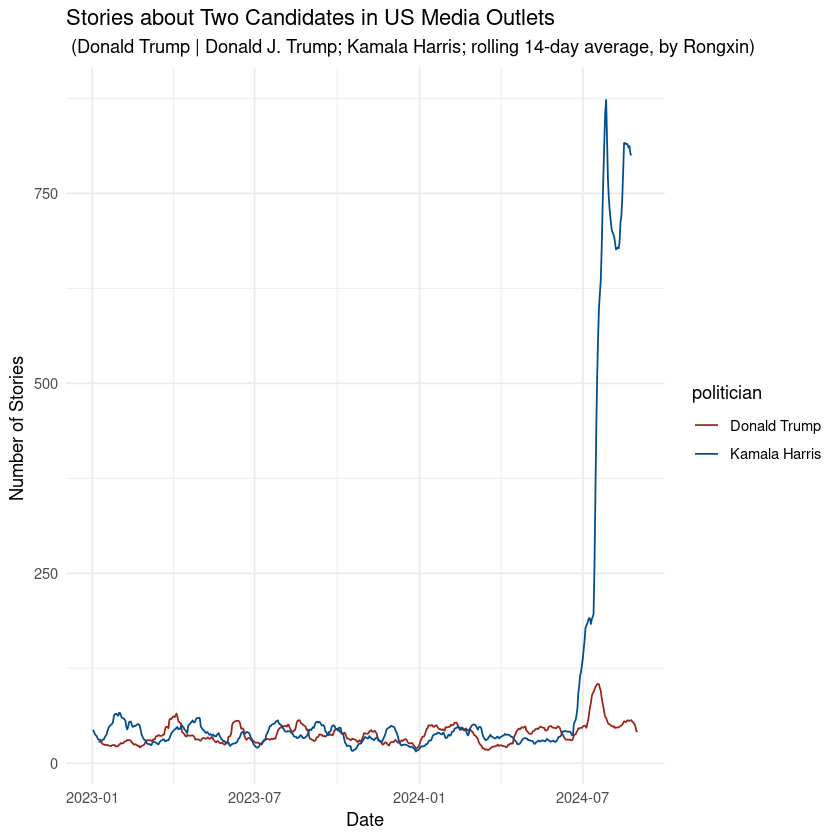

In [18]:
nature_colors <- c("#9B241B", "#014E8D") # nature brand
g <- ggplot(data.plot, aes(x = publish_date, y = rolling_avg, group = politician, color = politician)) +
    geom_line() +
    # geom_point(color = syn_colors[[2]]) +
    theme_minimal() +
    # geom_vline(xintercept = as.Date("2023-03-11"), linetype = "dashed", color = syn_colors[[1]]) +
    # geom_vline(xintercept = as.Date("2024-03-05"), linetype = "dashed", color = syn_colors[[1]]) +
    # geom_vline(xintercept = as.Date("2023-07-18"), linetype = "dashed", color = syn_colors[[1]]) +
    # annotate("text", x = as.Date("2023-07-18"), y = 48, label = "W/ John Kerry", color = syn_colors[[1]], vjust = 1) +
    # annotate("text", x = as.Date("2023-03-11"), y = 78, label = "Take Office", color = syn_colors[[1]], vjust = 1) +
    # annotate("text", x = as.Date("2024-03-05"), y = 78, label = "National Two Sessions", color = syn_colors[[1]], vjust = 1) +
    # theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    scale_color_manual(values = nature_colors) +
    labs(
        title = "Stories about Two Candidates in US Media Outlets",
        subtitle = " (Donald Trump | Donald J. Trump; Kamala Harris; rolling 14-day average, by Rongxin)",
        x = "Date",
        y = "Number of Stories "
    )
g


In [19]:
ggsave("./two.candidates.pdf", g, width = 18, height = 6, units = "in", dpi = 300)


Warning message:
“Removed 13 rows containing missing values or values outside the scale range
(`geom_line()`).”
